In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
@jit
def solvepoissonvonneumann(b,niter):
    # b: matrise med randverdier, nan hvor vi skal finne V
    # niter: antall iterasjoner
    # V: returnerer potensialet
    V = b.copy()
    for i in range(len(V.flat)):
        if (np.isnan(b.flat[i])):
            V.flat[i] = 0.0
    Vnew = V.copy()
    Lx = b.shape[0]
    Ly = b.shape[0]
    for n in range(niter):
        for ix in range(Lx):
            for iy in range(Ly):
                ncount = 0
                Vsum = 0.0
                if (np.isnan(b[ix,iy])):
                    if (ix>0):
                        Vsum = Vsum + V[ix-1,iy]
                        ncount = ncount + 1
                    if (ix<Lx-1):
                        Vsum = Vsum + V[ix+1,iy]
                        ncount = ncount + 1
                    if (iy>0):
                        Vsum = Vsum + V[ix,iy-1]
                        ncount = ncount + 1
                    if (iy<Ly-1):
                        Vsum = Vsum + V[ix,iy+1]
                        ncount = ncount + 1
                    Vnew[ix,iy] = Vsum/ncount
        V,Vnew = Vnew,V
    return V

In [2]:
L = 100
b = np.zeros((L,L))
b[:] = np.float('nan')

x0 = int(L*0.25)
x1 = int(L*0.75)
y0 = int(L*0.25)
y1 = int(L*0.30)
for ix in range(x0,x1):
    for iy in range(y0,y1):
        b[ix,iy] = 0.5

In [3]:
x0 = int(L*0.25)
x1 = int(L*0.75)
y0 = int(L*0.70)
y1 = int(L*0.75)
for ix in range(x0,x1):
    for iy in range(y0,y1):
        b[ix,iy] = -0.5

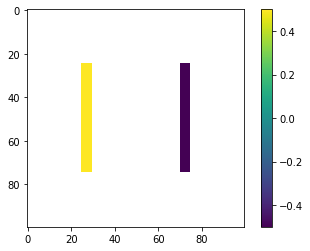

In [4]:
plt.imshow(b)
plt.colorbar()

In [5]:
V = solvepoissonvonneumann(b,10000)

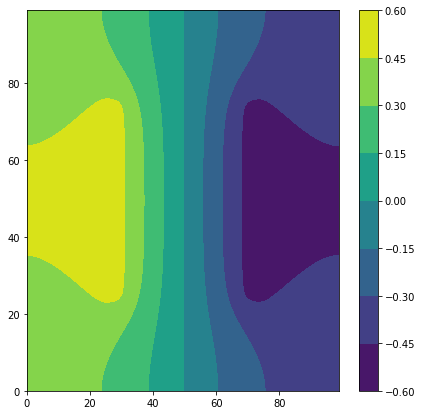

In [7]:
plt.figure(figsize=(7,7))
plt.contourf(V)
plt.colorbar()

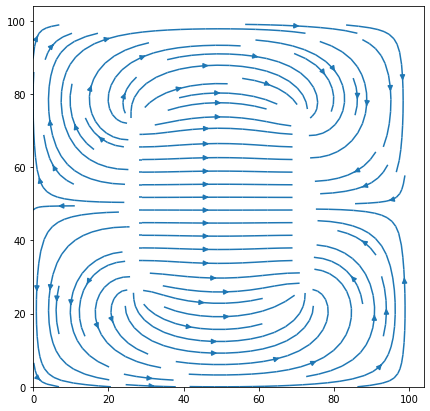

In [8]:
Ey,Ex = np.gradient(-V)
x = np.linspace(0,L-1,L)
y = np.linspace(0,L-1,L)
rx,ry = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
#plt.quiver(rx,ry,Ex,Ey)
plt.streamplot(x,y,Ex,Ey)

In [10]:
rhos = np.zeros((L,L))
for ix in range(L):
    for iy in range(L):
        if (not(np.isnan(b[ix,iy]))):
            drho = .0
            if (np.isnan(b[ix-1,iy])):
                drho = drho - (V[ix,iy]-V[ix-1,iy])*(-1)
            if (np.isnan(b[ix+1,iy])):
                drho = drho - (V[ix+1,iy]-V[ix,iy])*(+1)
            if (np.isnan(b[ix,iy-1])):
                drho = drho - (V[ix,iy]-V[ix,iy-1])*(-1)
            if (np.isnan(b[ix,iy+1])):
                drho = drho - (V[ix,iy+1]-V[ix,iy])*(1)
            rhos[ix,iy] = drho
            

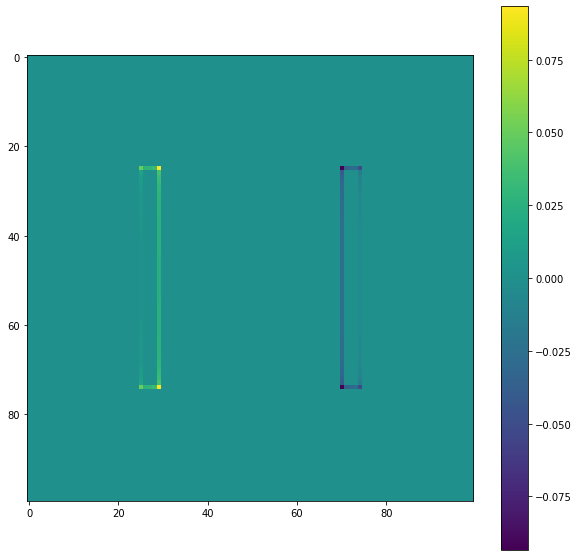

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(rhos)
plt.colorbar()